## AIT580 Final Project
### Student's Full Name: Leah Antler
### Submission Date: 07/05/2023

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Import data
df = pd.read_csv("sleep_data.csv")
df_original = df

## Part 1 - Data cleaning and wrangling

### 1. Add Avg_Hours_Slept_inMinutes column to the dataframe in the event if we need conversion in the future tasks

In [3]:
df['Avg_Hours_Slept_inMinutes'] = df['AVG_HOURS_SLEPT'] * 60
df.head(5)

,INDEX,YEAR,AVG_HOURS_SLEPT,STANDARD_ERROR,TYPE_OF_DAYS,AGE_GROUP,SEX,Avg_Hours_Slept_inMinutes
0,0,2003,8.57,0.018,All days,15 years and over,Both,514.2
1,1,2004,8.55,0.026,All days,15 years and over,Both,513.0
2,2,2005,8.62,0.023,All days,15 years and over,Both,517.2
3,3,2006,8.63,0.024,All days,15 years and over,Both,517.8
4,4,2007,8.57,0.024,All days,15 years and over,Both,514.2


### 1.1 Filter out SEX = Both and AGE_Group != 15 years and over from the data set as they add ambiguity to our data frame


In [4]:
df = df.query("SEX != 'Both' and AGE_GROUP !='15 years and over'")
df = df.reset_index(drop=True)

## Part 2 - Calculations and plots

### 2.1 Calculate average hours of sleep

#### 2.1.1 Calculate average hours of sleep grouped by SEX column and plot a scatter plot graph with the result

In [5]:
average_sleep_byAge = df.groupby(['SEX']).apply(lambda x: x[['AVG_HOURS_SLEPT', 'Avg_Hours_Slept_inMinutes']].mean()).reset_index()
average_sleep_byAge.columns =['SEX', 'AVG_HOURS_SLEPT', 'Avg_Hours_Slept_inMinutes']
average_sleep_byAge

,SEX,AVG_HOURS_SLEPT,Avg_Hours_Slept_inMinutes
0,Men,8.731074,523.864444
1,Women,8.880630,532.837778


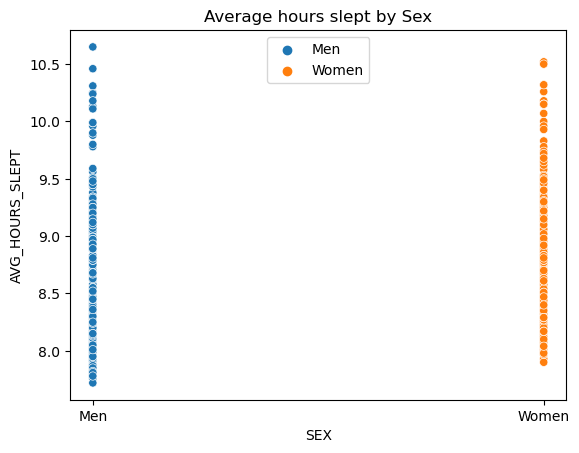

In [6]:
sns.scatterplot(df, x="SEX", y="AVG_HOURS_SLEPT", hue="SEX").set(title="Average hours slept by Sex")
plt.legend( loc='upper center')
plt.show()

#### 2.1.2 Calculate average by AGE_GROUP

In [7]:
average_sleep_byAge = df.groupby('AGE_GROUP')['AVG_HOURS_SLEPT'].mean().sort_values(ascending=False)
average_sleep_byAge

AGE_GROUP
15 to 24 years       9.499556
65 years and over    8.965111
25 to 34 years       8.792778
35 to 44 years       8.585333
55 to 64 years       8.508778
45 to 54 years       8.483556
Name: AVG_HOURS_SLEPT, dtype: float64

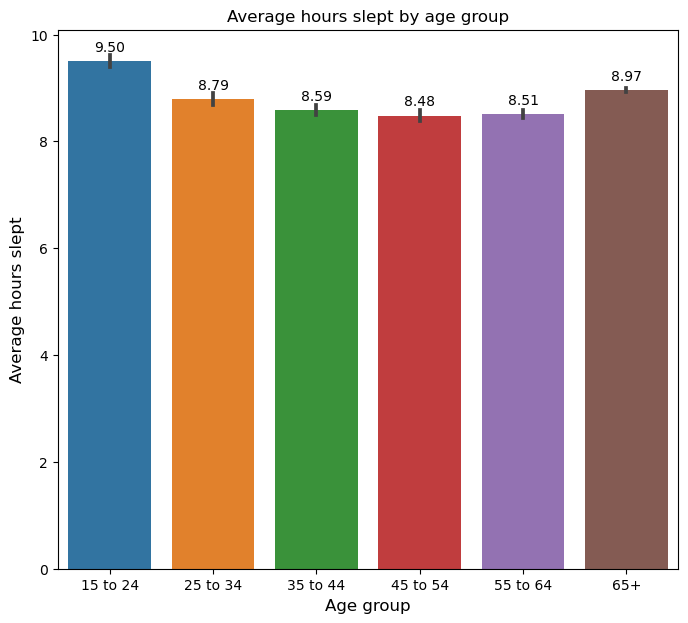

In [8]:
data = df
fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(data=data, x="AGE_GROUP", y="AVG_HOURS_SLEPT").set(title="Average hours slept by age group")

x_labels = ['15 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65+']
plt.gca().set_xticklabels(x_labels)
plt.gca().set_xlabel("Age group", fontsize=12)
plt.gca().set_ylabel("Average hours slept", fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### 2.1.3 Average hours of sleep grouped by gender and age group

In [9]:
avg_sleep_bySex_Age = df.groupby(['SEX', 'AGE_GROUP']).apply(lambda x: x[['AVG_HOURS_SLEPT', 'Avg_Hours_Slept_inMinutes']].mean()).reset_index()
avg_sleep_bySex_Age.columns =['SEX', 'AGE_GROUP', 'AVG_HOURS_SLEPT', 'Avg_Hours_Slept_inMinutes']
avg_sleep_bySex_Age

,SEX,AGE_GROUP,AVG_HOURS_SLEPT,Avg_Hours_Slept_inMinutes
0,Men,15 to 24 years,9.479111,568.746667
1,Men,25 to 34 years,8.637111,518.226667
2,Men,35 to 44 years,8.482889,508.973333
3,Men,45 to 54 years,8.374444,502.466667
4,Men,55 to 64 years,8.467111,508.026667
5,Men,65 years and over,8.945778,536.746667
6,Women,15 to 24 years,9.520000,571.200000
7,Women,25 to 34 years,8.948444,536.906667
8,Women,35 to 44 years,8.687778,521.266667
9,Women,45 to 54 years,8.592667,515.560000


### Plotting bar chart based on gender, age group and average sleep in hours

In [10]:


plt.figure(figsize=(10,8))

categories = df_grouped['AGE_GROUP'].unique()
groups = df_grouped['SEX'].unique()

offset = 0.1
minYValue = df_grouped['AVG_HOURS_SLEPT'].min()
maxYValue = df_grouped['AVG_HOURS_SLEPT'].max()
bar_width = 0.35
plt.ylim(minYValue-offset, maxYValue+offset)

x = range(len(categories))

for i, group in enumerate(groups):
    values = df_grouped[df_grouped['SEX']== group]['AVG_HOURS_SLEPT']
    plt.bar(np.array(x) + i * bar_width, values, bar_width, label=group)

plt.xlabel('Age Group')
plt.ylabel('Mean Value')
plt.title('Gender VS. Mean of Average Sleep in hours')

# Customize the x-axis tick labels
plt.xticks(np.array(x) + bar_width / 2, categories)

# Add a legend
plt.legend()

# Display the chart
plt.show()

NameError: name 'df_grouped' is not defined

<Figure size 1000x800 with 0 Axes>

### 2.1.4 Calculation correlation between Men, Women and hours of sleep

In [11]:
df['Age_group_encoded'] = df['AGE_GROUP'].astype('category').cat.codes

columns_to_check = ['AGE_GROUP','Age_group_encoded']

for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values of {column}:")
    print(unique_values)
    print()


Unique values of AGE_GROUP:
['15 to 24 years' '25 to 34 years' '35 to 44 years' '45 to 54 years'
 '55 to 64 years' '65 years and over']

Unique values of Age_group_encoded:
[0 1 2 3 4 5]



In [12]:
df_men = df.query("SEX == 'Men'")
correlation_men = df_men[['Age_group_encoded', 'AVG_HOURS_SLEPT']].corr(method = 'pearson')
correlation_men

,Age_group_encoded,AVG_HOURS_SLEPT
Age_group_encoded,1.000000,-0.271045
AVG_HOURS_SLEPT,-0.271045,1.000000


In [ ]:
df_women = df.query("SEX == 'Women'")
correlation_women = df_women[['Age_group_encoded', 'AVG_HOURS_SLEPT']].corr(method = 'pearson')
correlation_women

### 2.1.5 Plotting Average hours slept by year (scatter plot)

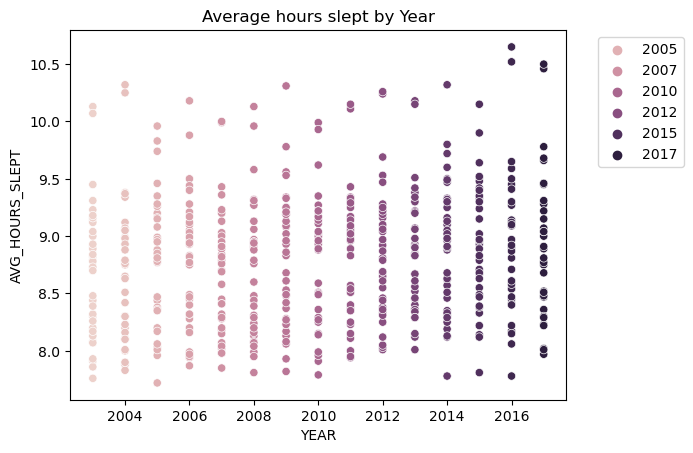

In [13]:
sns.scatterplot(data=data, x="YEAR", y="AVG_HOURS_SLEPT", hue="YEAR").set(title="Average hours slept by Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 2.1.6 Filter ambigous columns to perform calculation and comprisons between avg_sleep_hours and type_of_days 

In [14]:
data_without_allDays = (df_original.query("TYPE_OF_DAYS != 'All days' and SEX == 'Both' and AGE_GROUP !='15 years and over'")).reset_index(drop=True)
data_without_allDays

,INDEX,YEAR,AVG_HOURS_SLEPT,STANDARD_ERROR,TYPE_OF_DAYS,AGE_GROUP,SEX,Avg_Hours_Slept_inMinutes
0,60,2003,8.75,0.080,Nonholiday weekdays,15 to 24 years,Both,525.0
1,61,2004,8.79,0.113,Nonholiday weekdays,15 to 24 years,Both,527.4
2,62,2005,9.01,0.100,Nonholiday weekdays,15 to 24 years,Both,540.6
3,63,2006,8.84,0.085,Nonholiday weekdays,15 to 24 years,Both,530.4
4,64,2007,8.71,0.105,Nonholiday weekdays,15 to 24 years,Both,522.6
...,...,...,...,...,...,...,...,...
175,310,2013,9.12,0.063,Weekend days and holidays,65 years and over,Both,547.2
176,311,2014,9.12,0.072,Weekend days and holidays,65 years and over,Both,547.2
177,312,2015,9.23,0.062,Weekend days and holidays,65 years and over,Both,553.8
178,313,2016,9.11,0.067,Weekend days and holidays,65 years and over,Both,546.6


### 2.1.7 Calculate average of avg_hours_slept grouped by type_of_days and age_group

In [15]:
avg_without_allDays = data_without_allDays.groupby(['TYPE_OF_DAYS', 'AGE_GROUP'])['AVG_HOURS_SLEPT'].mean().sort_values(ascending=False)

avg_without_allDays = data_without_allDays.groupby(['TYPE_OF_DAYS', 'AGE_GROUP']).apply(lambda x: x[['AVG_HOURS_SLEPT', 'Avg_Hours_Slept_inMinutes']].mean()).reset_index()
avg_without_allDays.columns =['TYPE_OF_DAYS', 'AGE_GROUP', 'AVG_HOURS_SLEPT', 'Avg_Hours_Slept_inMinutes']
avg_without_allDays


,TYPE_OF_DAYS,AGE_GROUP,AVG_HOURS_SLEPT,Avg_Hours_Slept_inMinutes
0,Nonholiday weekdays,15 to 24 years,9.013333,540.80
1,Nonholiday weekdays,25 to 34 years,8.292667,497.56
2,Nonholiday weekdays,35 to 44 years,8.095333,485.72
3,Nonholiday weekdays,45 to 54 years,8.012667,480.76
4,Nonholiday weekdays,55 to 64 years,8.180000,490.80
5,Nonholiday weekdays,65 years and over,8.838667,530.32
6,Weekend days and holidays,15 to 24 years,10.134667,608.08
7,Weekend days and holidays,25 to 34 years,9.451333,567.08
8,Weekend days and holidays,35 to 44 years,9.234000,554.04
9,Weekend days and holidays,45 to 54 years,9.104000,546.24


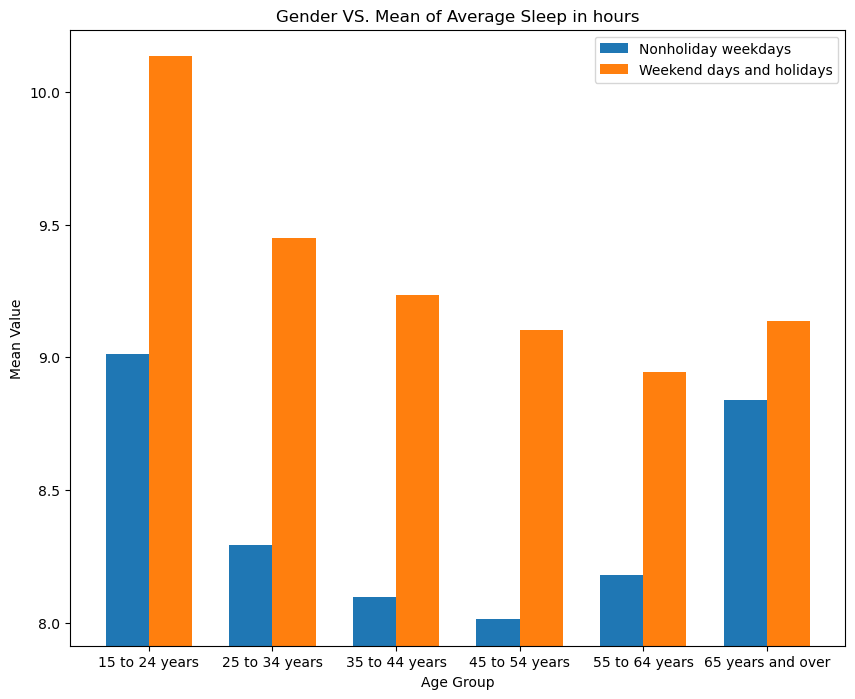

In [16]:
plt.figure(figsize=(10,8))

categories = avg_without_allDays['AGE_GROUP'].unique()
groups = avg_without_allDays['TYPE_OF_DAYS'].unique()

offset = 0.1
minYValue = avg_without_allDays['AVG_HOURS_SLEPT'].min()
maxYValue = avg_without_allDays['AVG_HOURS_SLEPT'].max()
bar_width = 0.35
plt.ylim(minYValue-offset, maxYValue+offset)

x = range(len(categories))

for i, group in enumerate(groups):
    values = avg_without_allDays[avg_without_allDays['TYPE_OF_DAYS']== group]['AVG_HOURS_SLEPT']
    plt.bar(np.array(x) + i * bar_width, values, bar_width, label=group)

plt.xlabel('Age Group')
plt.ylabel('Mean Value')
plt.title('Gender VS. Mean of Average Sleep in hours')

# Customize the x-axis tick labels
plt.xticks(np.array(x) + bar_width / 2, categories)

# Add a legend
plt.legend()

# Display the chart
plt.show()

### 2.1.8 Correlation between type_of_days and avg_hours_slept

In [17]:
data_without_allDays['TYPE_OF_DAYS_encoded'] = data_without_allDays['TYPE_OF_DAYS'].astype('category').cat.codes
columns_to_check = ['TYPE_OF_DAYS','TYPE_OF_DAYS_encoded']

avg_without_allDays_result = data_without_allDays.groupby(['TYPE_OF_DAYS']).apply(lambda x: x[['TYPE_OF_DAYS_encoded']].mean()).reset_index()
avg_without_allDays_result.columns =['TYPE_OF_DAYS', 'TYPE_OF_DAYS_encoded']
avg_without_allDays_result

,TYPE_OF_DAYS,TYPE_OF_DAYS_encoded
0,Nonholiday weekdays,0.0
1,Weekend days and holidays,1.0


In [18]:
correlation = data_without_allDays[['TYPE_OF_DAYS_encoded', 'AVG_HOURS_SLEPT']].corr(method = 'pearson')
correlation

,TYPE_OF_DAYS_encoded,AVG_HOURS_SLEPT
TYPE_OF_DAYS_encoded,1.000000,0.752856
AVG_HOURS_SLEPT,0.752856,1.000000


### Part3 - Prediction models


### 3.1.1 Split the dataset into a training set (80%) and a test set (20%)

In [19]:
from sklearn.model_selection import train_test_split
predict_data = df.reset_index(drop=True)
# predict_data = df.reset_index(drop=True)

colsNum = predict_data.shape[1]
X= np.array(predict_data.iloc[:, 0:colsNum-1])
X= np.array(predict_data['YEAR'])
y = np.array(predict_data['AVG_HOURS_SLEPT'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print("Total rows: ", len(predict_data))
print("Training rows: ", len(X_train))
print("Testing rows: ", len(X_test))

Total rows:  540
Training rows:  432
Testing rows:  108


### 3.1.2 Build a LR model to find details (i.e., intercept and slope) of the relationship between YEAR and AVG_HOURS_SLEPT.

In [20]:
X = predict_data['YEAR']
y = predict_data['AVG_HOURS_SLEPT']

X = X.values.reshape(-1,1)

model = LinearRegression()
clf = model.fit(X, y)
print ('Slope Coefficient: ', clf.coef_)
print('Y intercept: ', clf.intercept_)

print('\n')
predictions = model.predict(X)
for index in range(len(predictions)):
    print('Actual: ', y[index], 'Predicted: ', predictions[index])

Slope Coefficient:  [0.0184246]
Y intercept:  -28.22760052910054


Actual:  9.14 Predicted:  8.676879629629635
Actual:  9.12 Predicted:  8.695304232804236
Actual:  9.2 Predicted:  8.713728835978838
Actual:  9.21 Predicted:  8.73215343915344
Actual:  9.03 Predicted:  8.750578042328048
Actual:  9.27 Predicted:  8.769002645502649
Actual:  9.56 Predicted:  8.78742724867725
Actual:  9.21 Predicted:  8.805851851851852
Actual:  9.33 Predicted:  8.82427645502646
Actual:  9.16 Predicted:  8.842701058201062
Actual:  9.3 Predicted:  8.861125661375663
Actual:  9.47 Predicted:  8.879550264550264
Actual:  9.51 Predicted:  8.897974867724873
Actual:  9.59 Predicted:  8.916399470899474
Actual:  9.78 Predicted:  8.934824074074076
Actual:  8.73 Predicted:  8.676879629629635
Actual:  8.65 Predicted:  8.695304232804236
Actual:  8.88 Predicted:  8.713728835978838
Actual:  8.93 Predicted:  8.73215343915344
Actual:  8.58 Predicted:  8.750578042328048
Actual:  8.9 Predicted:  8.769002645502649
Actual:  9.25 Pr

### 3.1.2 Use the test set to make prediction and print out Root Mean Squared Error (RMSE).

In [23]:
np.sqrt(mean_squared_error(y, predictions))

0.5630148521930195

### 3.1.3 Plot the predicted straight line with the test data.

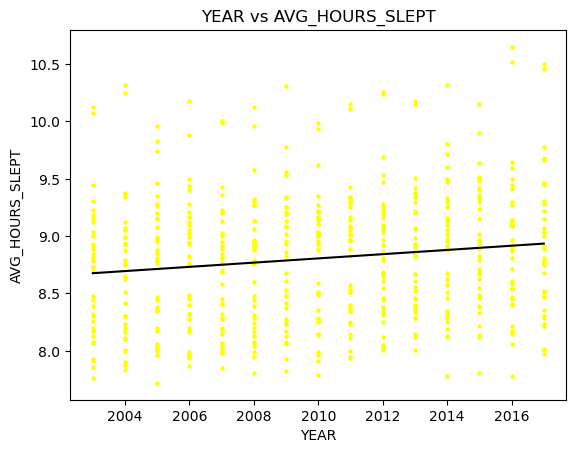

In [24]:
plt.scatter(X,y, c="yellow", s=5)
predictions = np.dot(X, clf.coef_)

for index in range(len(predictions)):
    predictions[index] = predictions[index]+clf.intercept_

plt.xlabel('YEAR')
plt.ylabel('AVG_HOURS_SLEPT')
plt.title('YEAR vs AVG_HOURS_SLEPT')
plt.plot(X,predictions, c="black")

## 3.2 Prediction based on type_of_days 

### 3.2.1 Split the dataset into a training set (80%) and a test set (20%)


In [25]:
from sklearn.model_selection import train_test_split
predict_data = data_without_allDays.reset_index(drop=True)

colsNum = predict_data.shape[1]
X= np.array(predict_data.iloc[:, 0:colsNum-1])
X= np.array(predict_data['TYPE_OF_DAYS'])
y = np.array(predict_data['AVG_HOURS_SLEPT'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print("Total rows: ", len(predict_data))
print("Training rows: ", len(X_train))
print("Testing rows: ", len(X_test))

Total rows:  180
Training rows:  144
Testing rows:  36


### 3.2.2 Build a LR model to find details (i.e., intercept and slope) of the relationship between TYPE_OF_DAYS and AVG_HOURS_SLEPT.

In [26]:
X = predict_data['TYPE_OF_DAYS_encoded']
y = predict_data['AVG_HOURS_SLEPT']

X = X.values.reshape(-1,1)

model = LinearRegression()
clf = model.fit(X, y)
print ('Slope Coefficient: ', clf.coef_)
print('Y intercept: ', clf.intercept_)

print('\n')
predictions = model.predict(X)
for index in range(len(predictions)):
    print('Actual: ', y[index], 'Predicted: ', predictions[index])

Slope Coefficient:  [0.92855556]
Y intercept:  8.405444444444447


Actual:  8.75 Predicted:  8.405444444444447
Actual:  8.79 Predicted:  8.405444444444447
Actual:  9.01 Predicted:  8.405444444444447
Actual:  8.84 Predicted:  8.405444444444447
Actual:  8.71 Predicted:  8.405444444444447
Actual:  8.83 Predicted:  8.405444444444447
Actual:  9.19 Predicted:  8.405444444444447
Actual:  8.94 Predicted:  8.405444444444447
Actual:  8.99 Predicted:  8.405444444444447
Actual:  8.95 Predicted:  8.405444444444447
Actual:  9.0 Predicted:  8.405444444444447
Actual:  9.31 Predicted:  8.405444444444447
Actual:  9.39 Predicted:  8.405444444444447
Actual:  9.12 Predicted:  8.405444444444447
Actual:  9.38 Predicted:  8.405444444444447
Actual:  10.1 Predicted:  9.334000000000001
Actual:  10.28 Predicted:  9.334000000000001
Actual:  9.89 Predicted:  9.334000000000001
Actual:  10.03 Predicted:  9.334000000000001
Actual:  10.0 Predicted:  9.334000000000001
Actual:  10.04 Predicted:  9.334000000000001
Actual:

In [27]:
np.sqrt(mean_squared_error(y, predictions))

0.40589539034243116

### 3.2.3 Plot the predicted straight line with the test data.

In [ ]:
plt.scatter(X,y, c="green", s=5)
predictions = np.dot(X, clf.coef_)

for index in range(len(predictions)):
    predictions[index] = predictions[index]+clf.intercept_

plt.xlabel('TYPE_OF_DAYS')
plt.ylabel('AVG_HOURS_SLEPT')
plt.title('TYPE_OF_DAYS vs AVG_HOURS_SLEPT')
plt.plot(X,predictions, c="black")